# Chapter 4 - Clustering Models
## Segment 2 - Hierarchial methods
#### Setting up for clustering analysis

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import plotly.express as px

import sklearn
import sklearn.metrics as sm

In [3]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [4]:
np.set_printoptions(precision=4, suppress=True)

plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [5]:
address = r'/home/sp/sp/Master Python for Datascience/10Python Datascience Essentials part2/Python Datascience Essentials2 Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values

y = cars.iloc[:,(9)].values

In [6]:
X

array([[ 21.   , 160.   , 110.   ,   2.62 ],
       [ 21.   , 160.   , 110.   ,   2.875],
       [ 22.8  , 108.   ,  93.   ,   2.32 ],
       [ 21.4  , 258.   , 110.   ,   3.215],
       [ 18.7  , 360.   , 175.   ,   3.44 ],
       [ 18.1  , 225.   , 105.   ,   3.46 ],
       [ 14.3  , 360.   , 245.   ,   3.57 ],
       [ 24.4  , 146.7  ,  62.   ,   3.19 ],
       [ 22.8  , 140.8  ,  95.   ,   3.15 ],
       [ 19.2  , 167.6  , 123.   ,   3.44 ],
       [ 17.8  , 167.6  , 123.   ,   3.44 ],
       [ 16.4  , 275.8  , 180.   ,   4.07 ],
       [ 17.3  , 275.8  , 180.   ,   3.73 ],
       [ 15.2  , 275.8  , 180.   ,   3.78 ],
       [ 10.4  , 472.   , 205.   ,   5.25 ],
       [ 10.4  , 460.   , 215.   ,   5.424],
       [ 14.7  , 440.   , 230.   ,   5.345],
       [ 32.4  ,  78.7  ,  66.   ,   2.2  ],
       [ 30.4  ,  75.7  ,  52.   ,   1.615],
       [ 33.9  ,  71.1  ,  65.   ,   1.835],
       [ 21.5  , 120.1  ,  97.   ,   2.465],
       [ 15.5  , 318.   , 150.   ,   3.52 ],
       [ 1

In [7]:
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

### Using scipy to generate dendrograms

In [8]:
Z = linkage(X, 'ward')

In [9]:
Z

array([[  0.    ,   1.    ,   0.255 ,   2.    ],
       [ 11.    ,  12.    ,   0.9621,   2.    ],
       [  9.    ,  10.    ,   1.4   ,   2.    ],
       [ 13.    ,  33.    ,   1.9103,   3.    ],
       [ 17.    ,  25.    ,   5.1157,   2.    ],
       [ 20.    ,  26.    ,   7.5097,   2.    ],
       [  6.    ,  23.    ,  10.0535,   2.    ],
       [ 19.    ,  36.    ,  10.1666,   3.    ],
       [ 21.    ,  22.    ,  14.0035,   2.    ],
       [  2.    ,  37.    ,  14.1771,   3.    ],
       [ 14.    ,  15.    ,  15.6215,   2.    ],
       [ 18.    ,  39.    ,  16.7875,   4.    ],
       [ 31.    ,  41.    ,  19.8678,   4.    ],
       [ 32.    ,  34.    ,  21.6097,   4.    ],
       [ 28.    ,  38.    ,  22.5473,   3.    ],
       [  8.    ,  44.    ,  29.8447,   5.    ],
       [  3.    ,   5.    ,  33.5403,   2.    ],
       [ 16.    ,  42.    ,  38.201 ,   3.    ],
       [  4.    ,  24.    ,  40.0052,   2.    ],
       [ 27.    ,  47.    ,  41.616 ,   6.    ],
       [  7.    ,  5

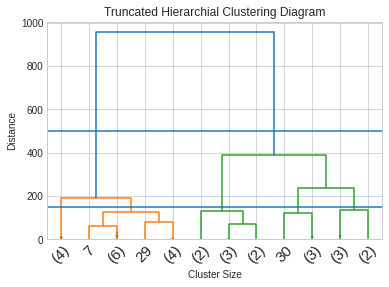

In [10]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

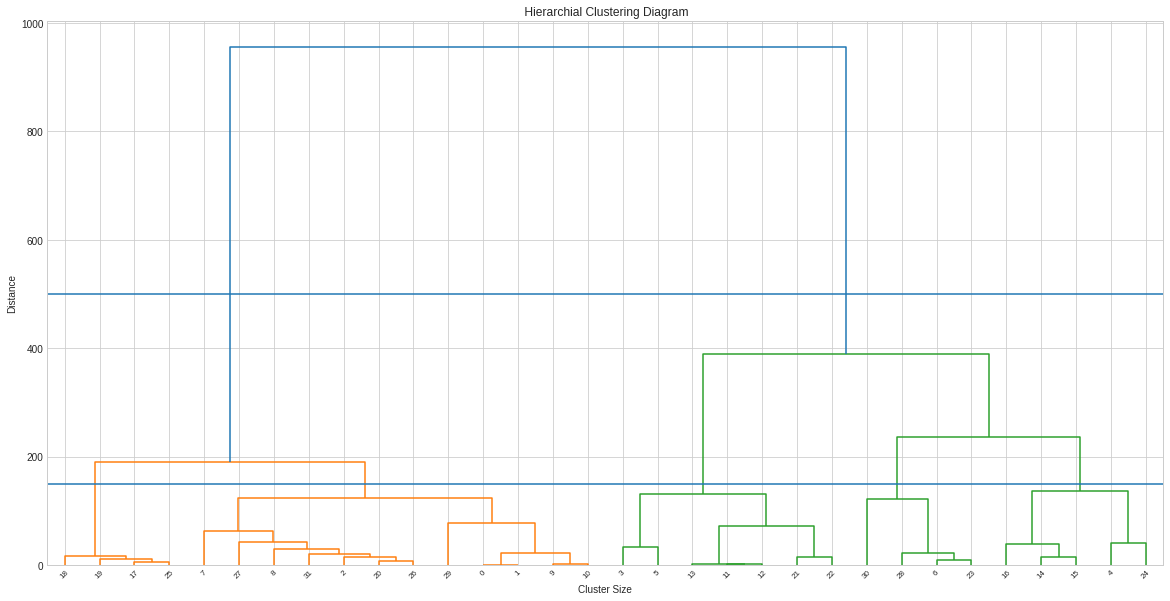

In [15]:
plt.figure(figsize=(20,10))
dendrogram(Z, p=6)

plt.title(' Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

## Generating hierarchical clusters

In [16]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [17]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [18]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875